# Brain Stroke Prediction - Machine Learning

----
----

In [57]:
import numpy as np
import pandas as pd

# visiualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# model constructing libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

## Data Loading, Data Analysis and Missing values

In [58]:
data=pd.read_csv('stroke.csv')
print('__MISSING TRAINING VALUES__')
print(data.isnull().sum())

__MISSING TRAINING VALUES__
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [59]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [60]:
print('number of stroke data: ',len(data[data['stroke']==1]))
print('number of non stroke data: ',len(data[data['stroke']==0]))

number of stroke data:  249
number of non stroke data:  4861


### Labels and attributes:
1. `id`: patient id.
2. `gender`: "Male" or "Female".
3. `age`: age of patient.
4. `hypertension`: 1 for the patient who has hypertension and 0 for the patient that doesn't.
5. `heart_disease`: 1 for the patient who has a heart disease and 0 for the patient that doesn't.
6. `ever_married`: "Yes" or "No".
7. `work_type`: "Private", "Self-employed", "Govt_job", "children" or "Never_worked".
8. `Residence_type`: "Urban" or "Rural".
9. `avg_glucose_level`: average glucuse level in the patients blood.
10. `bmi`: body mass index.
11. `smoking_status`: "Unknown", "never smoked", "formerly smoked" or "never smoked".
12. `stroke`: 1 if the patient had a stroke or 0 if not.

- numerical data include: age, avg_glucose_level and bmi.
- categorical data include: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status.
>  NOTE: All categorical data are nominal

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [62]:
data.shape

(5110, 12)

---
---

## Visualizations

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1948\824688695.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes_count = pd.value_counts(data['stroke'], sort=True)


Text(0.5, 1.0, 'Class count')

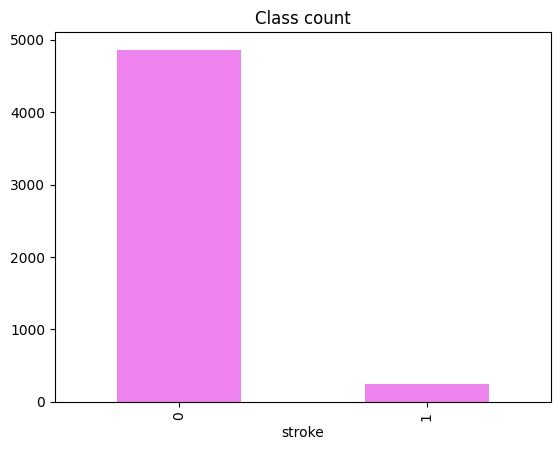

In [63]:
classes_count = pd.value_counts(data['stroke'], sort=True)
classes_count.plot(kind = 'bar', color='violet')
plt.title('Class count')

In [64]:
print("probabiltiy of having hypertension and have had a stroke = ",len(data[(data['hypertension']==1)&(data['stroke']==1)])/ len(data[data['stroke']==1]))

probabiltiy of having hypertension and have had a stroke =  0.26506024096385544


In [65]:
print("probabiltiy of not having hypertension and have had a stroke = ",len(data[(data['hypertension']==0)&(data['stroke']==1)])/ len(data[data['stroke']==1]))

probabiltiy of not having hypertension and have had a stroke =  0.7349397590361446


In [66]:
print("probabiltiy of having a heart disease and have had a stroke = ",len(data[(data['heart_disease']==1)&(data['stroke']==1)])/ len(data[data['stroke']==1]))

probabiltiy of having a heart disease and have had a stroke =  0.18875502008032127


In [67]:
print("probabiltiy of not having a heart disease and have had a stroke = ",len(data[(data['heart_disease']==0)&(data['stroke']==1)])/ len(data[data['stroke']==1]))

probabiltiy of not having a heart disease and have had a stroke =  0.8112449799196787


In [68]:
data['bmi'].fillna(data['bmi'].median(),inplace=True)
stroke_patients = data[data['stroke']==1]
non_stroke_patients = data[data['stroke']==0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1948\1053337393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(),inplace=True)


In [69]:
print('number of unknowns',len(data[data['smoking_status']=='Unknown']))

number of unknowns 1544


In [70]:
data['smoking_status'].replace('Unknown', data['smoking_status'].mode().values[0], inplace = True)
stroke_patients = data[data['stroke']==1]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1948\1969762787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smoking_status'].replace('Unknown', data['smoking_status'].mode().values[0], inplace = True)


In [71]:
## Collect numerical variables in a dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = data.select_dtypes(include=numerics)
# Remmove the Y variable
numerical_df.drop('stroke', axis=1, inplace=True)
# Check correlation among numerical independent variables using correlation matrix
cor = numerical_df.corr()
cor

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.005555  0.324296      0.158293       0.036916   

                   avg_glucose_level       bmi  
id                          0.001092  0.005555  
age                         0.238171  0.324296  
hypertension                0.174474  0.158293  
heart_disease               0.161857  0.036916  
avg_glucose_level           1.000000  0.166876  
bmi                         0.166876  1.000000

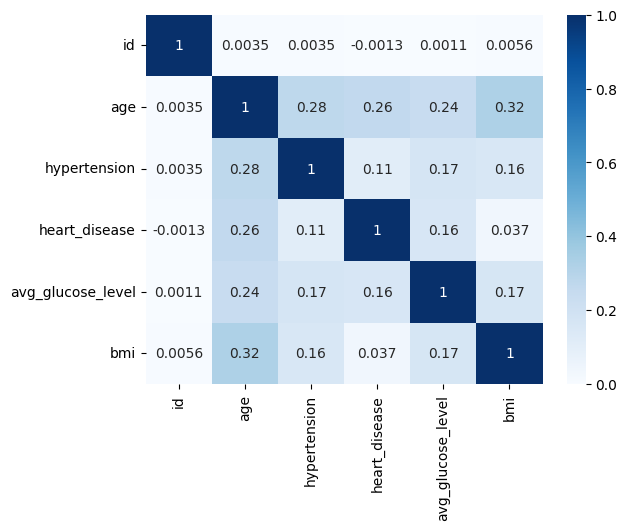

In [72]:
# View heat map of the correlation matrix
sns.heatmap(cor, annot = True,cmap='Blues');

---
---

## Data cleaning & preparation

In [73]:
#filling missing values in bmi
data['bmi'].fillna(data['bmi'].median(),inplace=True)
stroke_patients = data[data['stroke']==1]
non_stroke_patients = data[data['stroke']==0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1948\1966669426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(),inplace=True)


In [74]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

dropping "Other" values in gender as they compose less than 0.001% of data

In [75]:
data = data[data['gender']!='Other']

checking for duplicates

In [76]:
print('number of duplicates:',data.duplicated().sum()) # no duplicates

number of duplicates: 0


## X & y preperation = Independent and Dependent Variables

In [77]:
x = data.drop(['id','stroke'], axis = 1)
x.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban             228.69  36.6  formerly smoked  
1          Rural             202.21  28.1     never smoked  
2          Rural             105.92  32.5     never smoked  
3          Urban             171.23  34.4           smokes  
4          Rural             174.12  24.0     never smoked

In [78]:
cat_val = x.select_dtypes('object')
x = pd.get_dummies(x, columns= cat_val.columns)
x.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
0  67.0             0              1             228.69  36.6          False   
1  61.0             0              0             202.21  28.1           True   
2  80.0             0              1             105.92  32.5          False   
3  49.0             0              0             171.23  34.4           True   
4  79.0             1              0             174.12  24.0           True   

   gender_Male  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0         True            False              True               False   
1        False            False              True               False   
2         True            False              True               False   
3        False            False              True               False   
4        False            False              True               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0               False                 False                  True   
1               False                  True                 False   
2               False                  True                 False   
3               False                 False                  True   
4               False                  True                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   
3                           False                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False

- get_dummies was used to turn all categorical columns into binary categories
- we can remove gender_female, ever_marries_no, Residence_type_Rural and smoking_status_never smoked as if gender_male = 0 then patient cant be a female and a male at the same time and if both values smoke and frmely smoked are 1 then the patient has never smoked and so on

In [79]:
x=x.drop(['gender_Female', 'ever_married_No', 'smoking_status_never smoked', 'Residence_type_Rural'], axis=1)
x.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0  67.0             0              1             228.69  36.6         True   
1  61.0             0              0             202.21  28.1        False   
2  80.0             0              1             105.92  32.5         True   
3  49.0             0              0             171.23  34.4        False   
4  79.0             1              0             174.12  24.0        False   

   ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0              True               False                   False   
1              True               False                   False   
2              True               False                   False   
3              True               False                   False   
4              True               False                   False   

   work_type_Private  work_type_Self-employed  work_type_children  \
0               True                    False               False   
1              False                     True               False   
2               True                    False               False   
3               True                    False               False   
4              False                     True               False   

   Residence_type_Urban  smoking_status_formerly smoked  smoking_status_smokes  
0                  True                            True                  False  
1                 False                           False                  False  
2                 False                           False                  False  
3                  True                           False                   True  
4                 False                           False                  False

In [80]:
y = data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Train-Test Split

In [81]:
x_train, x_test,y_train, y_test =  train_test_split(x,y,test_size=0.2)

In [82]:
print('x train and y train shape: ', x_train.shape, y_train.shape)
print('x test and y test shape: ',x_test.shape, y_test.shape)

x train and y train shape:  (4087, 15) (4087,)
x test and y test shape:  (1022, 15) (1022,)


----
----

## Logistic Regression

In [83]:
lr=LogisticRegression()

In [84]:
#training the model
lr.fit(x_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
#testing the model on training data
lr_train_prediction=lr.predict(x_train)
print(lr_train_prediction)

#accuracy on training data
training_data_accuracy = accuracy_score(lr_train_prediction, y_train)
print('Accuracy on training data: ', training_data_accuracy)

[0 0 0 ... 0 0 0]
Accuracy on training data:  0.9515537068754588


In [86]:
#testing the model on testing data
lr_test_prediction=lr.predict(x_test)
print(lr_test_prediction)

#accuracy on testing data
testing_data_accuracy = accuracy_score(lr_test_prediction, y_test)
print('Accuracy on testing data: ', testing_data_accuracy)

[0 0 0 ... 0 0 0]
Accuracy on testing data:  0.9510763209393346


In [87]:
#confusion matrix
con=confusion_matrix(y_test, lr_test_prediction)
print(con)

[[972   0]
 [ 50   0]]


<Axes: >

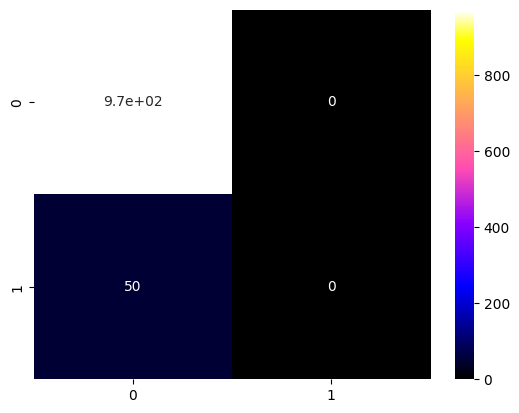

In [88]:
#plotting of the confusion matrix
sns.heatmap(con, annot=True, cmap= 'gnuplot2')

In [89]:
#accuracy
lr_accuracy=accuracy_score(y_test, lr_test_prediction)
lr_accuracy

0.9510763209393346

In [90]:
#classification report
print(classification_report(y_test, lr_test_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

----

## Support Vector Machine

In [91]:
svm=SVC(kernel='linear')

In [92]:
# training the SVM model with Training data
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [93]:
#testing the model on training data
svm_train_prediction=svm.predict(x_train)
print(svm_train_prediction)

#accuracy on training data
train_data_accuracy = accuracy_score(svm_train_prediction, y_train)
print('Accuracy on training data: ', train_data_accuracy)

[0 0 0 ... 0 0 0]
Accuracy on training data:  0.951309028627355


In [94]:
#testing the model on testing data
svm_test_prediction=svm.predict(x_test)
print(svm_test_prediction)

#accuracy on training data
test_data_accuracy = accuracy_score(svm_test_prediction, y_test)
print('Accuracy on testing data: ', test_data_accuracy)

[0 0 0 ... 0 0 0]
Accuracy on testing data:  0.9510763209393346


In [95]:
#confusion matrix
con=confusion_matrix(y_test, svm_test_prediction)
print(con)

[[972   0]
 [ 50   0]]


<Axes: >

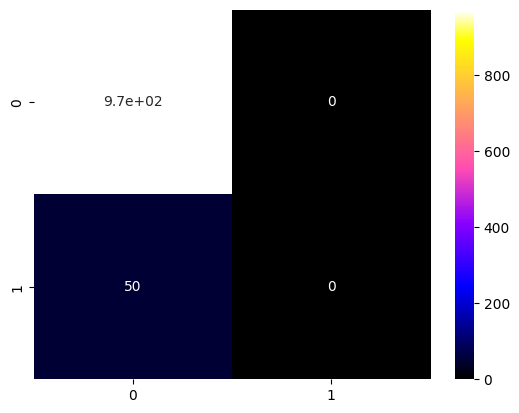

In [96]:
#plotting of the confusion matrix
sns.heatmap(con, annot=True, cmap= 'gnuplot2')

In [97]:
#accuracy
svm_accuracy=accuracy_score(y_test, svm_test_prediction)
svm_accuracy

0.9510763209393346

In [98]:
#classification report
print(classification_report(y_test, svm_test_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

----

## Decision Tree

In [99]:
dtc=DecisionTreeClassifier(criterion='gini')

In [100]:
#training the model on training data 
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
#testing the model on training data
dtc_train_prediction=dtc.predict(x_train)
print(dtc_train_prediction)

#accuracy on training data
dtctrain_data_accuracy=accuracy_score(dtc_train_prediction, y_train)
print('Accuracy on training data: ', dtctrain_data_accuracy)

[0 1 0 ... 0 0 0]
Accuracy on training data:  1.0


In [102]:
#testing the model on testing data
dtc_test_prediction=svm.predict(x_test)
print(dtc_test_prediction)

#accuracy on testing data
dtctest_data_accuracy = accuracy_score(dtc_test_prediction, y_test)
print('Accuracy on training data: ', dtctest_data_accuracy)

[0 0 0 ... 0 0 0]
Accuracy on training data:  0.9510763209393346


In [103]:
#confusion matrix
con=confusion_matrix(y_test, dtc_test_prediction)
print(con)

[[972   0]
 [ 50   0]]


<Axes: >

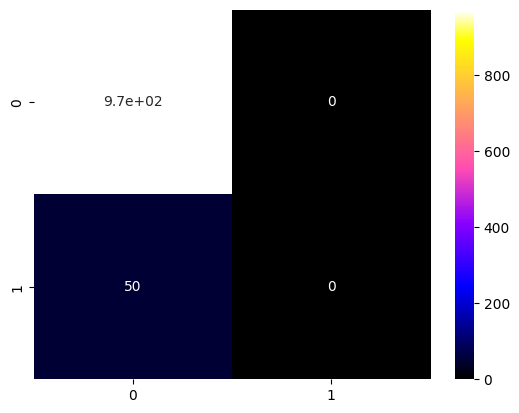

In [104]:
#plotting of the confusion matrix
sns.heatmap(con, annot=True, cmap= 'gnuplot2')

In [105]:
#accuracy
dtc_accuracy=accuracy_score(y_test, dtc_test_prediction)
dtc_accuracy

0.9510763209393346

In [106]:
#classification report
print(classification_report(y_test, dtc_test_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

----
----

# Real Test Results:

## Evaluating all the models

In [107]:
x = data.drop(['id'], axis = 1)
cat_val = x.select_dtypes('object')
x = pd.get_dummies(x, columns= cat_val.columns)
x=x.drop(['gender_Female', 'ever_married_No', 'smoking_status_never smoked', 'Residence_type_Rural'], axis=1)
x

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21  28.1       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75  28.1       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Male  ever_married_Yes  work_type_Govt_job  \
0            True              True               False   
1           False              True               False   
2            True              True               False   
3           False              True               False   
4           False              True               False   
...           ...               ...                 ...   
5105        False              True               False   
5106        False              True               False   
5107        False              True               False   
5108         True              True               False   
5109        False              True                True   

      work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                      False               True                    False   
1                      False              False                     True   
2                      False               True                    False   
3                      False               True                    False   
4                      False              False                     True   
...                      ...                ...                      ...   
5105                   False               True                    False   
5106                   False              False                     True   
5107                   False              False                     True   
5108                   False               True                    False   
5109                   False              False                    False   

      work_type_children  Residence_type_Urban  \
0                  False                  True   
1                  False                 False   
2                  False                 False   
3                  False                  True   
4                  False                 False   
...                  ...                   ...   
5105               False                  True   
5106               False                  True   
5107               False                 False   
5108               False                 False   
5109               False                  True   

      smoking_status_formerly smoked  smoking_status_smokes  
0                               True                  False  
1                              False                  False  
2                              False                  False  
3                              False                   True  
4                              False                  False  
...                              ...                    ...  
5105                           False                  False  
5106                           False                  False  
5107                           False                  False  
5108                            True                  False  
5109                           False                  False  

[5109 rows x 16 columns]

In [108]:
#logistic
lr_results=pd.DataFrame(['Logistic regression', lr_accuracy, training_data_accuracy]).transpose()
lr_results.columns=['Model', 'Accuracy on TestData', 'Accuracy on TrainData']

#svm
svm_results=pd.DataFrame(['Support Vector Machine', svm_accuracy, train_data_accuracy]).transpose()
svm_results.columns=['Model', 'Accuracy on TestData', 'Accuracy on TrainData']

#random forest
dtc_results=pd.DataFrame(['Decision Tree Classification', dtc_accuracy, dtctrain_data_accuracy]).transpose()
dtc_results.columns=['Model', 'Accuracy on TestData', 'Accuracy on TrainData']


#table
df_models=pd.concat([lr_results, svm_results, dtc_results], axis=0).reset_index(drop=True)
df_models

Model Accuracy on TestData Accuracy on TrainData
0           Logistic regression             0.951076              0.951554
1        Support Vector Machine             0.951076              0.951309
2  Decision Tree Classification             0.951076                   1.0

## Saving the Models

- this is for later use of our models that allows us to avoid the need to retrain it every time you want to make predictions.
- we can deploy your saved model to production environments for real-time predictions.
- we can easily share the saved model.

In [109]:
import pickle
pickle.dump(lr, open('./lrmodel.sav', 'wb'))

In [110]:
import pickle
pickle.dump(svm, open('./svmmodel.sav', 'wb'))

In [111]:
import pickle
pickle.dump(dtc, open('./dtcmodel.sav', 'wb'))